<p style="text-align:center; font-size:24px; font-weight:bold;">Report</p>

<p style="text-align:center;">In the data exploration, no missing values were identified. Notably, negative energy prices were observed, possibly attributable to subsidies. These values are not a problem to predictive modeling.</p>

<p style="text-align:center;">The original dataset was timestamped at 5-minute intervals, and for simplification, I aggregated the data into daily summaries using Python's resampling function.</p>

<p style="text-align:center;">Additionally, density plots were drawn to assess the distribution of demand and prices. The demand plots exhibited a somewhat normal or student distribution, while the price plots showed some weird patterns.</p>

<p style="text-align:center;">Analyses included a correlation check for variable relationships and the identification of outliers through box plots. Kmeans clustering was applied to unveil potential patterns, and for trend identification, rolling mean and standard deviation analyses were done</p>

<p style="text-align:center; font-size:24px; font-weight:bold;">Libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

<p style="text-align:center; font-size:24px; font-weight:bold;">Load Data</p>

In [2]:
df = pd.read_csv("data.csv")

In [39]:
df.head(3)

,date_time,demand_new_south_wales,price_new_south_wales,demande_queensland,price_queensland,demand_south_australia,price_south_australia,demand_tasmania,price_tasmania,demand_victoria,price_victoria
0,2023-01-01 00:05:00,6906.63,140.40,5718.46,139.73,1443.65,127.57,1001.74,450.10,4676.57,129.51
1,2023-01-01 00:10:00,6854.28,133.96,5721.47,136.00,1438.16,122.85,958.14,117.44,4722.43,124.72
2,2023-01-01 00:15:00,6856.32,120.00,5691.56,121.80,1433.89,111.14,957.12,105.40,4672.63,111.64


<p style="text-align:center; font-size:24px; font-weight:bold;">Data types</p>

In [3]:
df.info()
df["date_time"] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date_time               105120 non-null  object 
 1   demand_new_south_wales  105120 non-null  float64
 2   price_new_south_wales   105120 non-null  float64
 3   demande_queensland      105120 non-null  float64
 4   price_queensland        105120 non-null  float64
 5   demand_south_australia  105120 non-null  float64
 6   price_south_australia   105120 non-null  float64
 7   demand_tasmania         105120 non-null  float64
 8   price_tasmania          105120 non-null  float64
 9   demand_victoria         105120 non-null  float64
 10  price_victoria          105120 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 11 columns):
 #   Column            

<p style="text-align:center; font-size:24px; font-weight:bold;">Summary statistics</p>

In [46]:
summary = df.iloc[:,1:].describe()
for i in summary.columns:
    summary[i] = summary[i].apply(lambda x : np.round(x,3))
summary

,demand_new_south_wales,price_new_south_wales,demande_queensland,price_queensland,demand_south_australia,price_south_australia,demand_tasmania,price_tasmania,demand_victoria,price_victoria
count,105120.000,105120.000,105120.000,105120.000,105120.000,105120.000,105120.000,105120.000,105120.000,105120.000
mean,7468.588,95.944,6053.852,90.668,1260.999,80.072,1138.638,55.732,4643.566,54.777
std,1340.115,294.875,1055.407,342.648,419.610,396.654,133.210,86.538,971.793,111.013
min,3664.340,-999.990,3016.910,-355.000,-44.560,-999.000,635.060,-998.070,1456.400,-995.780
25%,6532.665,57.920,5378.180,39.658,1092.600,0.000,1042.408,12.140,4001.158,2.320
50%,7342.910,85.980,5914.860,75.890,1319.495,59.070,1119.150,54.280,4538.605,53.525
75%,8255.130,114.770,6768.760,112.392,1496.122,115.130,1216.330,81.900,5227.760,99.450
max,13118.730,16599.890,10099.620,15500.000,3141.660,16600.000,1687.050,15500.000,8949.370,14522.260


<p style="text-align:center; font-size:24px; font-weight:bold;">Missing Values</p>

In [47]:
df.iloc[:,1:].isna().sum()

demand_new_south_wales    0
price_new_south_wales     0
demande_queensland        0
price_queensland          0
demand_south_australia    0
price_south_australia     0
demand_tasmania           0
price_tasmania            0
demand_victoria           0
price_victoria            0
dtype: int64

In [6]:
def normalize(data):
    for i in data.columns[1:] :
        µ = data[i].mean()
        sigma = data[i].std()
        data[i] = data[i].apply(lambda x : (x - µ) / sigma)
    return data

<p style="text-align:center; font-size:24px; font-weight:bold;">Visualizing Series</p>

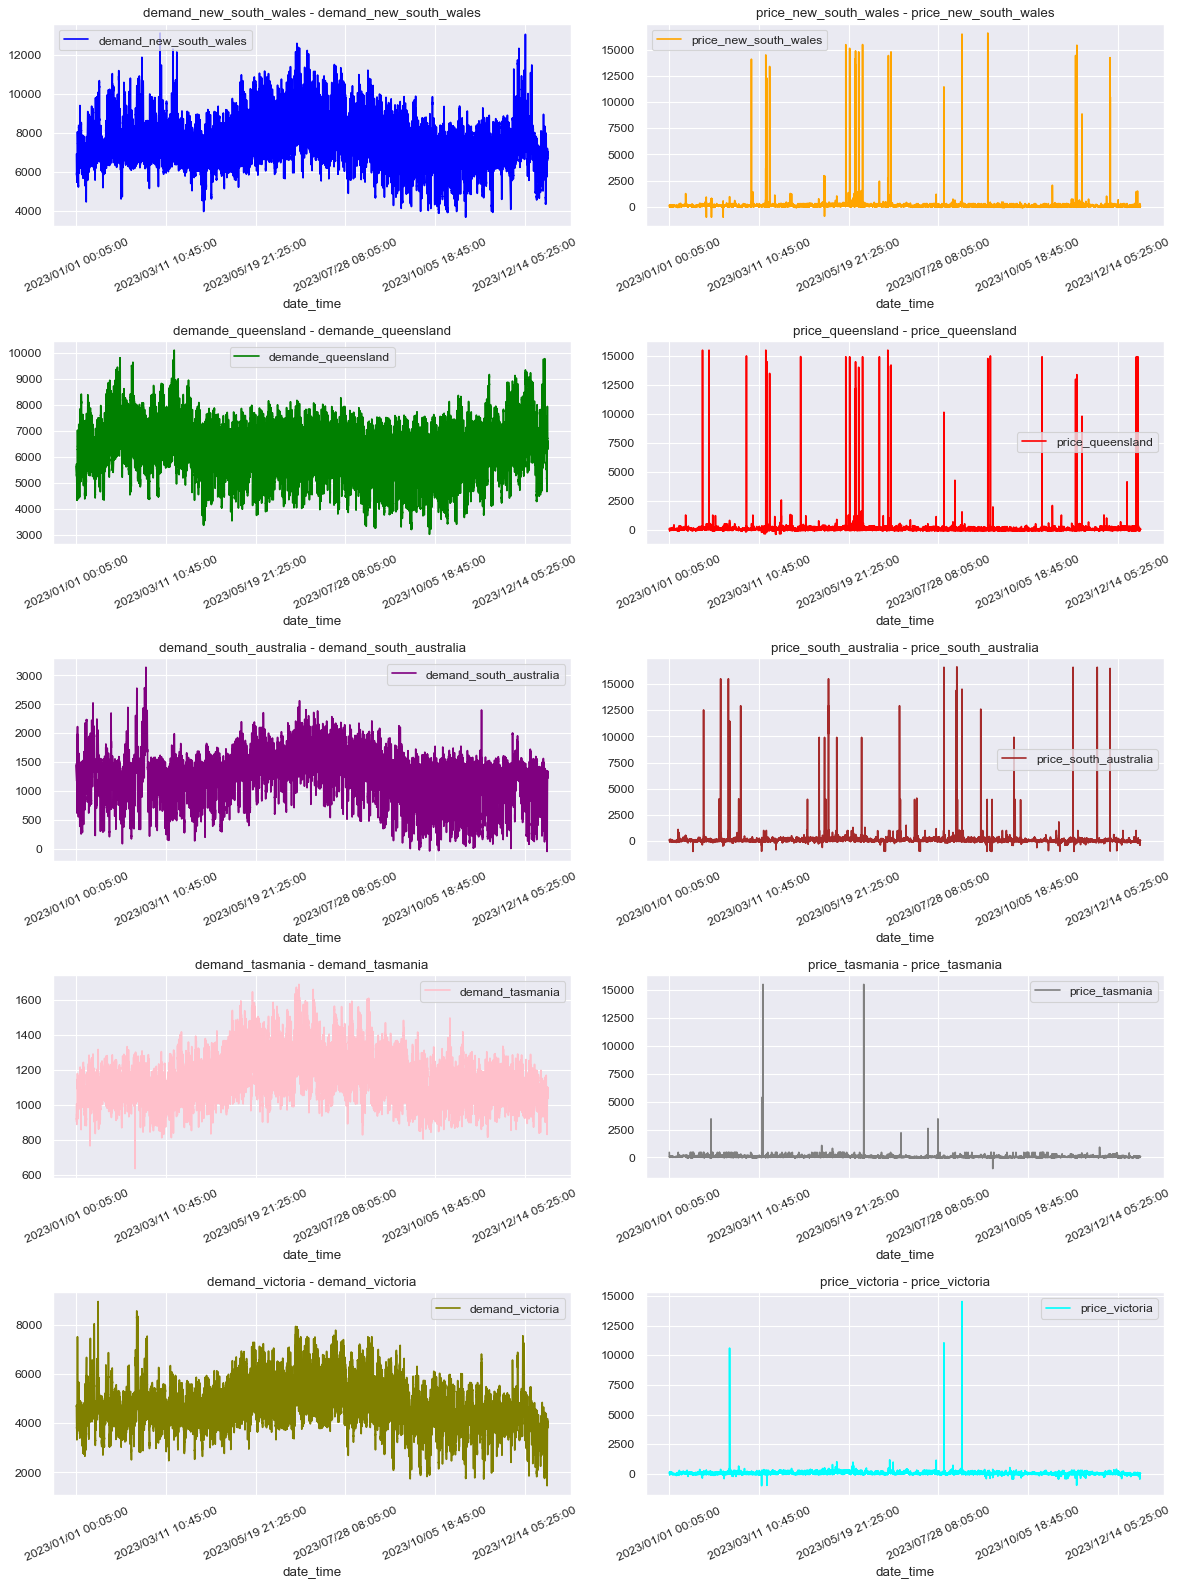

In [66]:



feature_keys = df.columns[1:]


colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_time_key = df.columns[0]
def visualize(data,col = 2, row=3,feature_keys = feature_keys):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=row, ncols=col, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i%(len(colors))]
        t_data = data[key]
        t_data.index = time_data
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(feature_keys[i], key),
            rot=25,
        )
        ax.legend([feature_keys[i]])
    plt.tight_layout()


visualize(df,2,5)

<p style="text-align:center; font-size:24px; font-weight:bold;">Visualizing daily data</p>

#### For Prices 

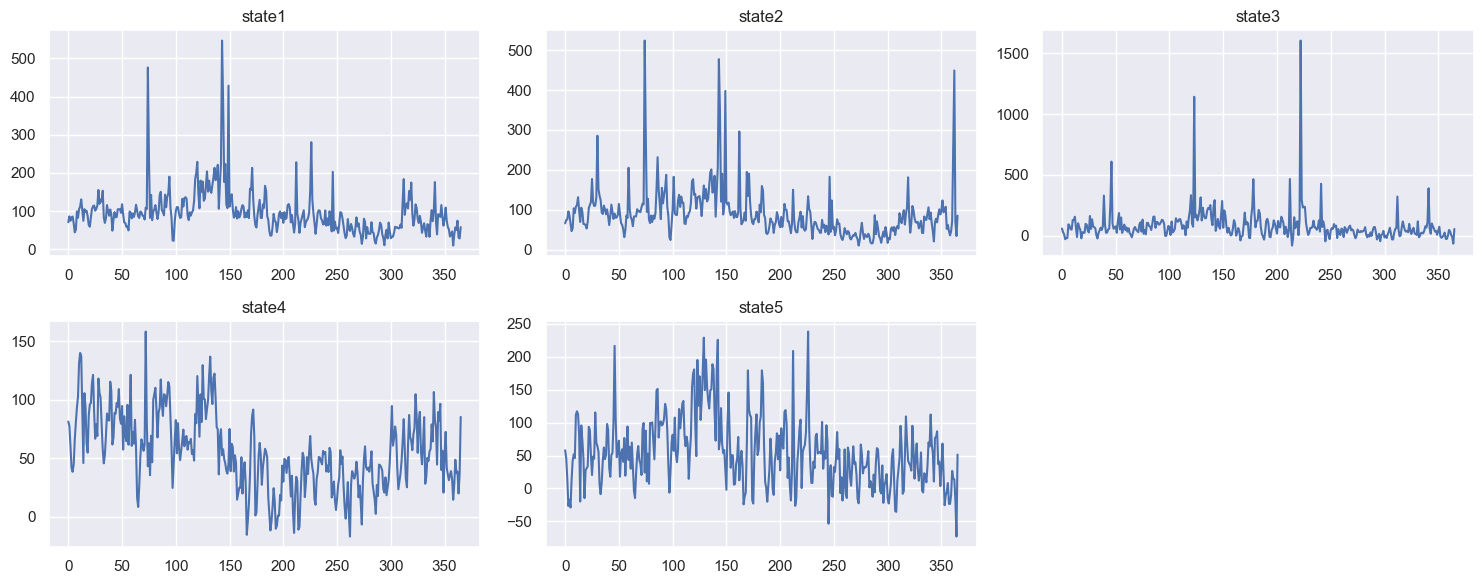

In [77]:
data = df.copy()
data["date_time"] = pd.to_datetime(data["date_time"])
data.index = data["date_time"]
data = data.drop(data.columns[[i for i in range(1, len(data.columns)) if i % 2 != 0]], axis=1)
data = data.drop("date_time", axis=1)

daily = {}
states = ["state1", "state2", "state3", "state4", "state5"]
i = 0
for state in states:
    daily[state] = data[data.columns[i]].resample('1D').mean().reset_index(drop=False)
    i += 1


fig, axs = plt.subplots(2, 3, figsize=(15, 6))


for i, (state, data) in enumerate(daily.items()):
    row = i // 3
    col = i % 3
    axs[row, col].plot(data.iloc[:, 1])
    axs[row, col].set_title(state)


for i in range(len(daily), 2 * 3):
    axs.flatten()[i].axis('off')

plt.tight_layout()
plt.show()

For Demands

In [11]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have already imported necessary libraries and created 'df'

data = df.copy()
data["date_time"] = pd.to_datetime(data["date_time"])
data.index = data["date_time"]
data = data.drop(data.columns[[i for i in range(1, len(data.columns)) if i % 2 == 0]], axis=1)
data = data.drop("date_time", axis=1)

daily = {}
states = ["state1", "state2", "state3", "state4", "state5"]
i = 0
for state in states:
    daily[state] = data[data.columns[i]].resample('1D').mean().reset_index(drop=False)
    i += 1

data = normalize(data)
# Create a scatter plot with lines for each state
fig = go.Figure()

for state, data in daily.items():
    fig.add_trace(go.Scatter(x=data["date_time"], y=data.iloc[:, 1], mode='lines', name=state))

# Update layout
fig.update_layout(
    title_text='Interactive 2D Plot',
    xaxis_title='Date',
    yaxis_title='Values',
    showlegend=True,
    height=600,
    width=1000
)

# Show interactive plot
fig.show()


<p style="text-align:center; font-size:24px; font-weight:bold;">Boxplots and Extreme Values</p>

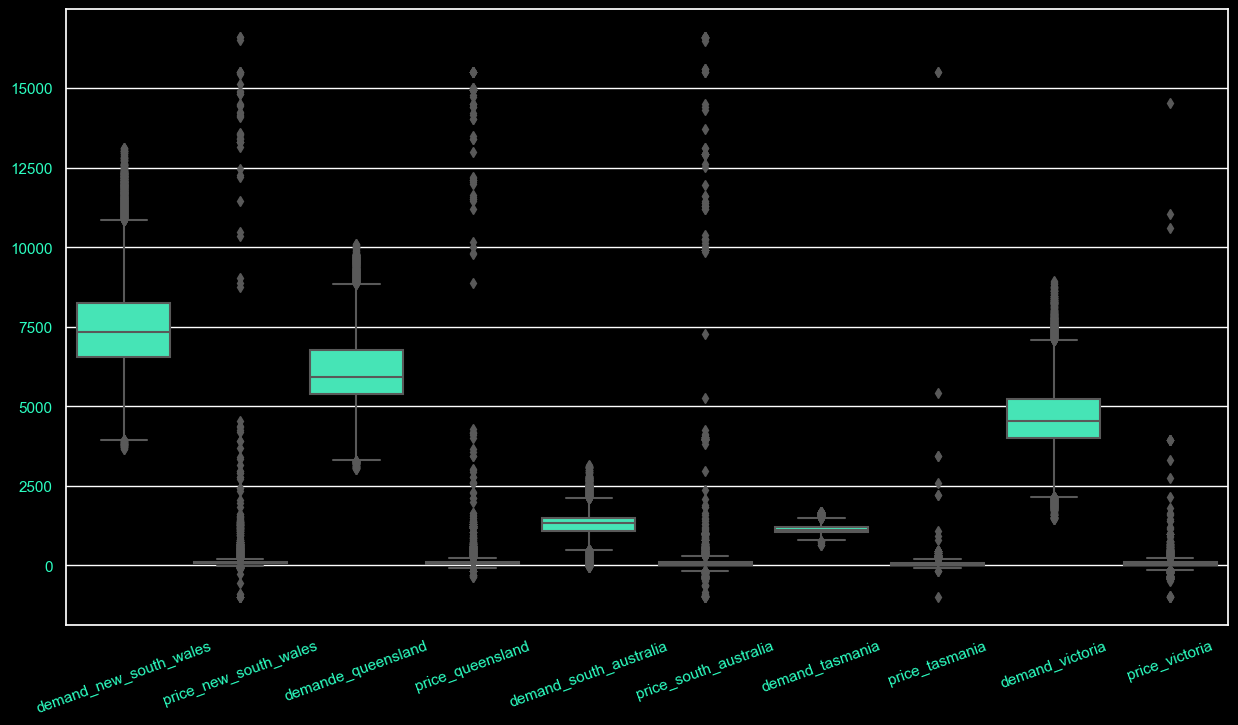

In [89]:
plt.style.use('dark_background')


custom_palette = sns.color_palette("crest", 10)


plt.figure(figsize=(15, 8))
sns.boxplot(data=df.iloc[:,1:],color='#2CFEC1')

plt.subplots_adjust(hspace=0.7, wspace=0.4)


ax = plt.gca()
ax.tick_params(axis='x', colors='#2CFEC1')  
ax.tick_params(axis='y', colors='#2CFEC1')  
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.show();

<p style="text-align:center; font-size:24px; font-weight:bold;">Rolling Stats</p>
<p style="text-align:center">Tried to apply some rolling mean and std on some of the series</p>

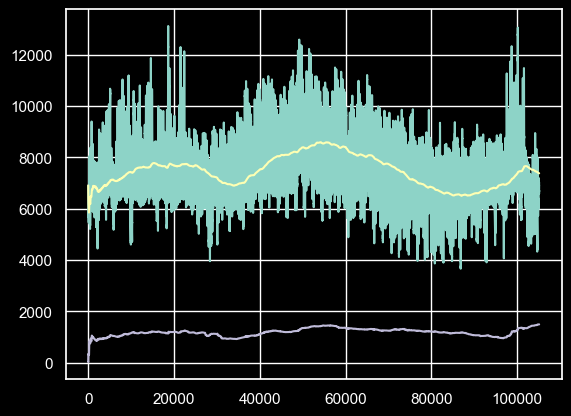

In [5]:
plt.style.use('dark_background')

rolling_mean_demand = df['demand_new_south_wales'].rolling(window=288*30, min_periods=1).mean()
rolling_std_demand = df['demand_new_south_wales'].rolling(window=288*30, min_periods=1).std()
plt.plot(df['demand_new_south_wales'])
plt.plot(rolling_mean_demand)
plt.plot(rolling_std_demand);

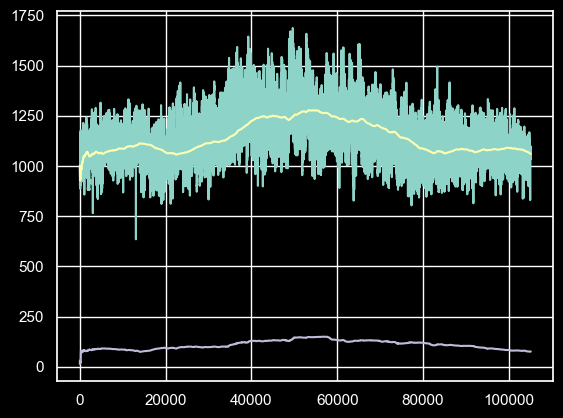

In [6]:
rolling_mean_demand = df['demand_tasmania'].rolling(window=288*30, min_periods=1).mean()
rolling_std_demand = df['demand_tasmania'].rolling(window=288*30, min_periods=1).std()
plt.plot(df['demand_tasmania'])
plt.plot(rolling_mean_demand)
plt.plot(rolling_std_demand);

<p style="text-align:center; font-size:24px; font-weight:bold;">Density Plots</p>

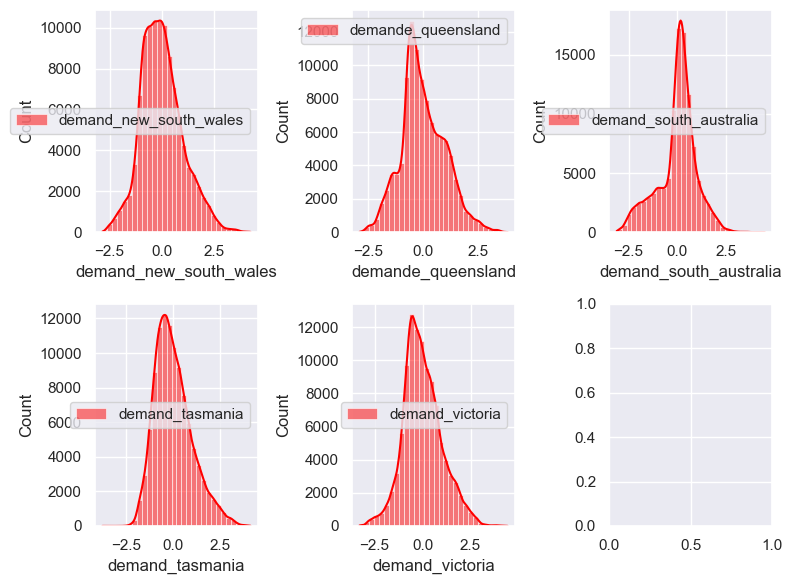

In [91]:
num_rows = 2
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))


axes = axes.flatten()


for i, variable in enumerate(df.columns[1::2]):
    sns.histplot(normalize(df)[variable], kde=True, bins=30, color='red', label=variable, ax=axes[i])
    axes[i].legend()


plt.tight_layout()

plt.show()

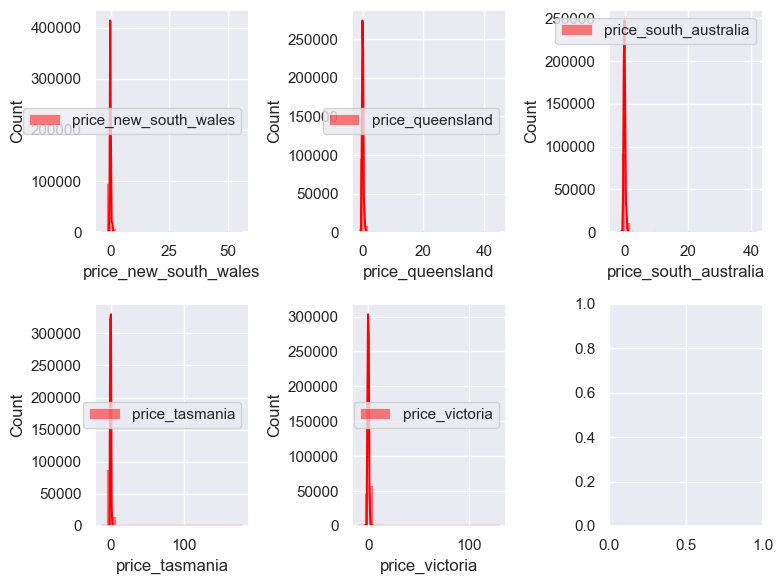

In [12]:

num_rows = 2
num_cols = 3


fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))


axes = axes.flatten()


for i, variable in enumerate(df.columns[2::2]):
    sns.histplot(normalize(df)[variable], kde=True, bins=30, color='red', label=variable, ax=axes[i])
    axes[i].legend()


plt.tight_layout()

plt.show()

<p style="text-align:center; font-size:24px; font-weight:bold;">Correlation</p>

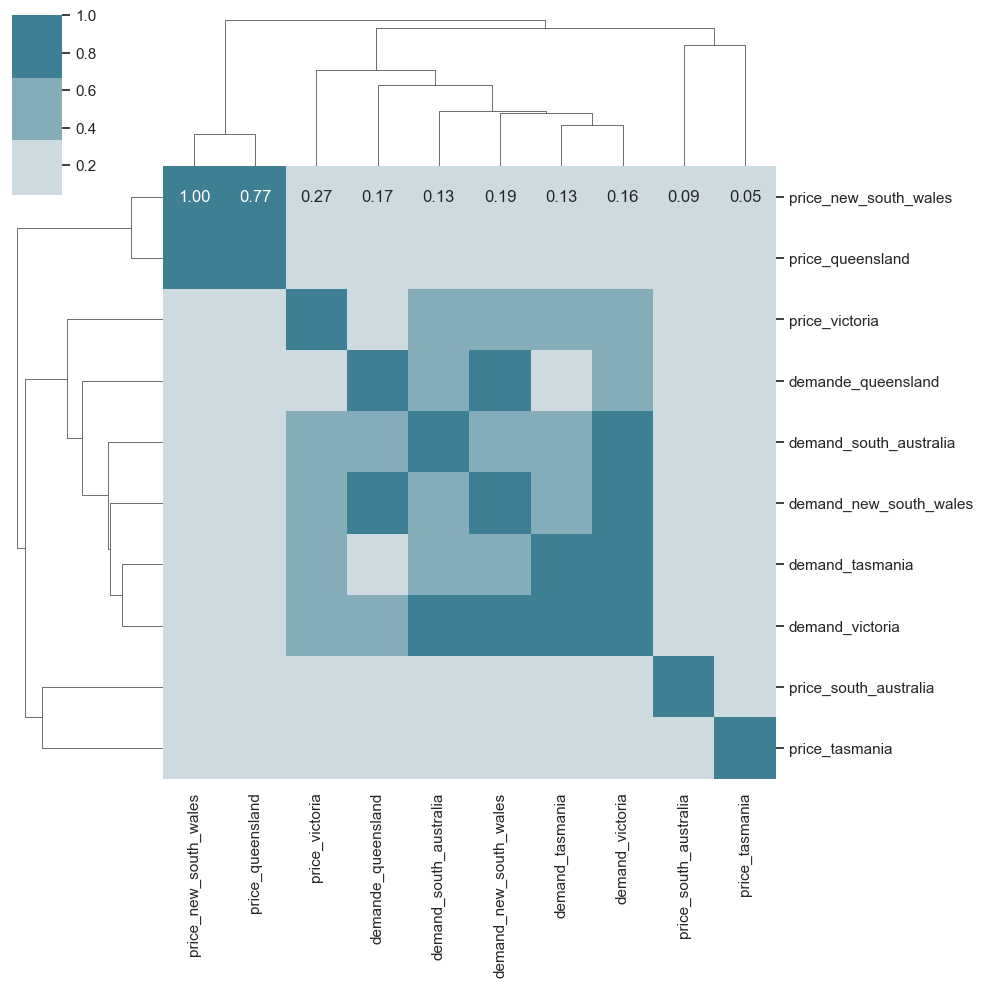

In [96]:
sns.clustermap(df.iloc[:,1:].corr(),
               annot=True,
               fmt='.2f',
               cmap=sns.diverging_palette(h_neg=20,
                                          h_pos=220), center=0);

<p style="text-align:center; font-size:30px; font-weight:bold;">Kmeans</p>



<p style="text-align:center;">
    I tried to apply k-means clustering to the dataset. The goal was to identify patterns and group similar time series together (just out of curiosity and experiment).
    I took only one example to plot.
    The algorithm in the example could find a way to cluster.
</p>


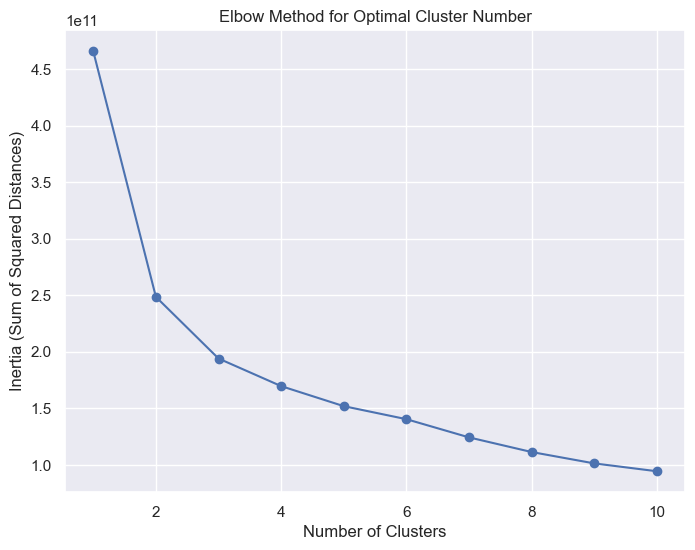

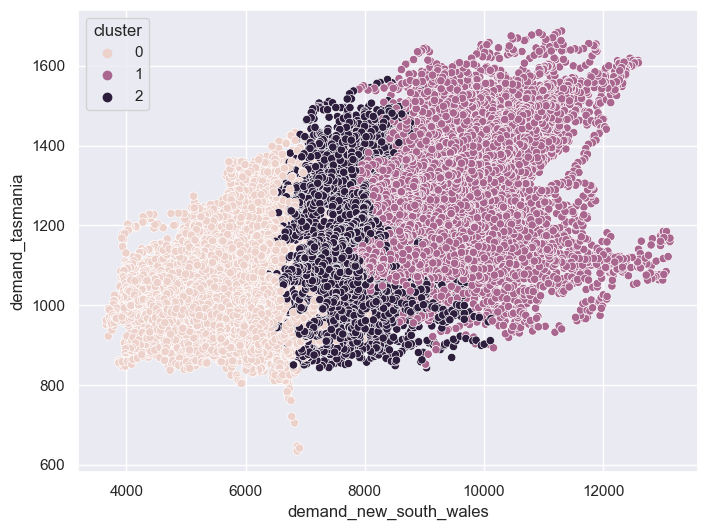

In [94]:
from sklearn.cluster import KMeans

X = df.iloc[:,1:]
cluster_range = range(1, 11)


inertias = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='demand_new_south_wales', y='demand_tasmania', hue='cluster', data=df)
plt.show()
